<a href="https://colab.research.google.com/github/IrutingaboRaissa/Formative-2---Data-Preprocessing/blob/master/Formative_2_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p data/audio data/augmented

import os, shutil
print("Current working directory:", os.getcwd())
!ls data


Current working directory: /content
audio  augmented


In [3]:
from google.colab import files
uploaded = files.upload()

for name in uploaded.keys():
    shutil.move(name, f"data/audio/{name}")

print("Files now available in data/audio/:")
!ls data/audio


Saving elyse_c.m4a to elyse_c.m4a
Saving elyse_yes a.m4a to elyse_yes a.m4a
Saving jabo_c.jpeg to jabo_c.jpeg
Saving jabo_yes a .jpeg to jabo_yes a .jpeg
Saving raissa_c.opus to raissa_c.opus
Saving raissa_yes a.opus to raissa_yes a.opus
Saving wengel _yes a.jpeg to wengel _yes a.jpeg
Saving wengel_c.jpeg to wengel_c.jpeg
Files now available in data/audio/:
 elyse_c.m4a	   'jabo_yes a .jpeg'	 wengel_c.jpeg
'elyse_yes a.m4a'   raissa_c.opus	'wengel _yes a.jpeg'
 jabo_c.jpeg	   'raissa_yes a.opus'


/tmp/ipython-input-2391635644.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filepath, sr=None)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


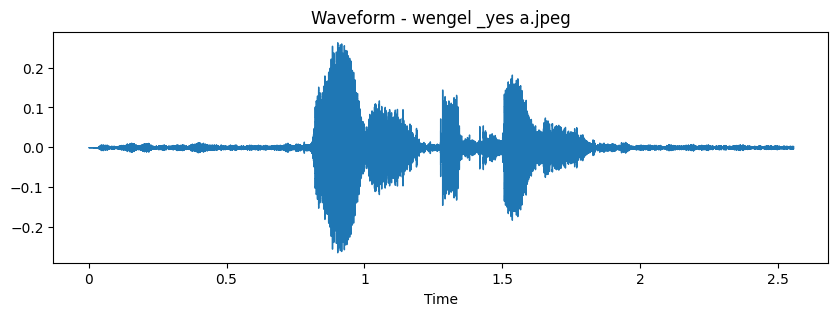

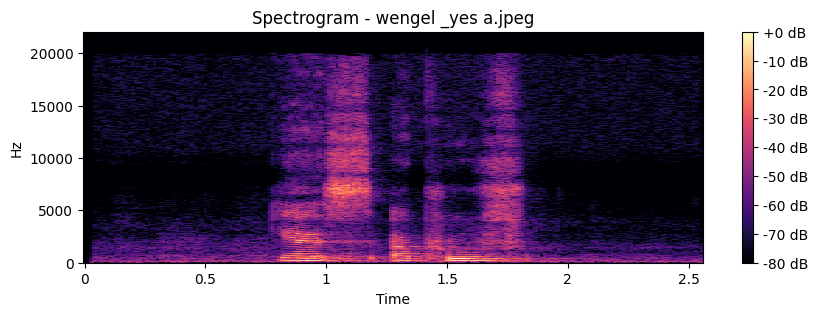

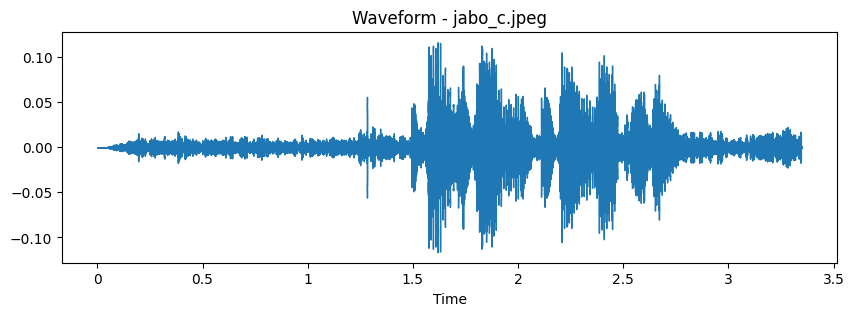

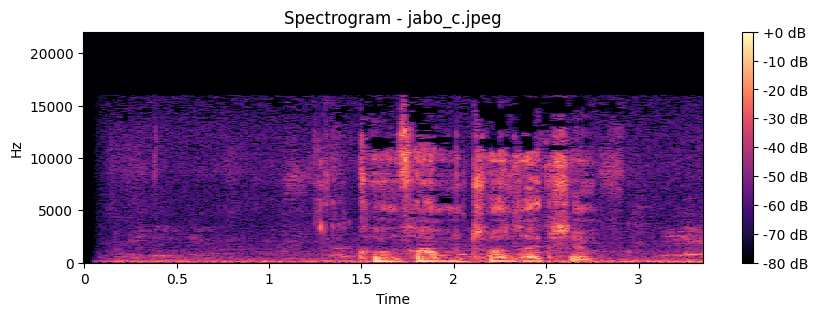

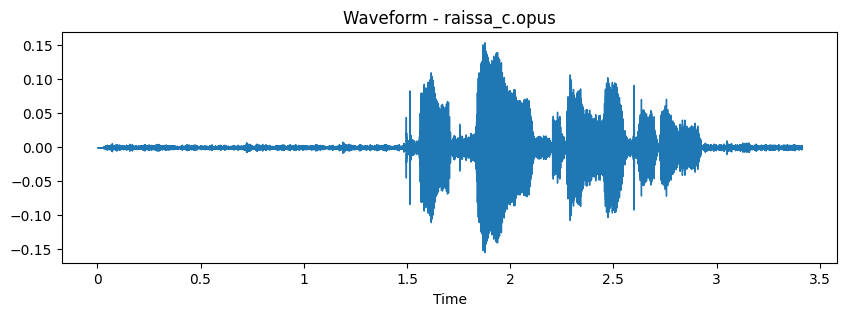

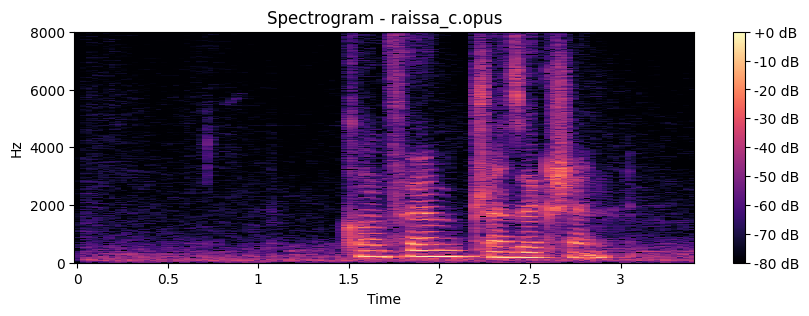

/tmp/ipython-input-2391635644.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filepath, sr=None)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


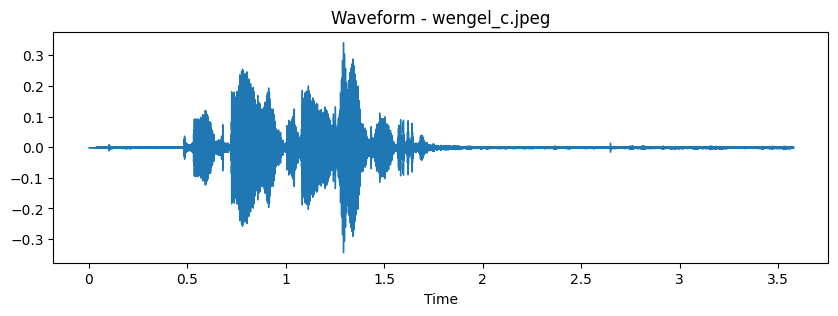

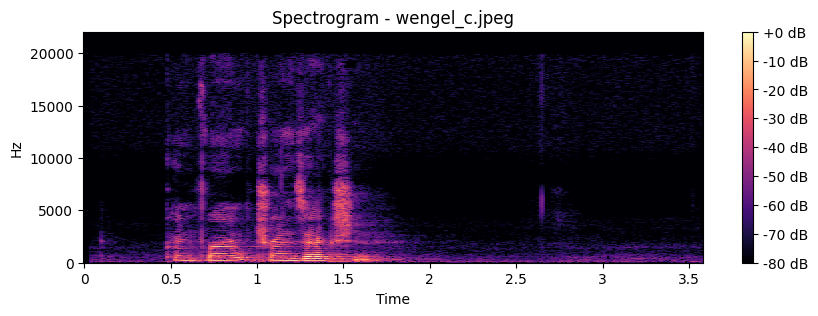

/tmp/ipython-input-2391635644.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filepath, sr=None)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


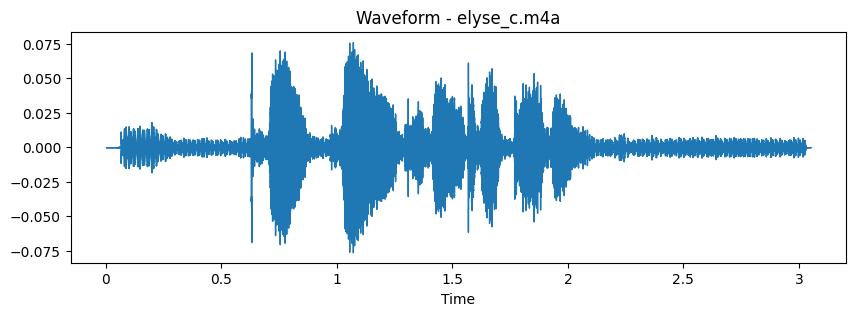

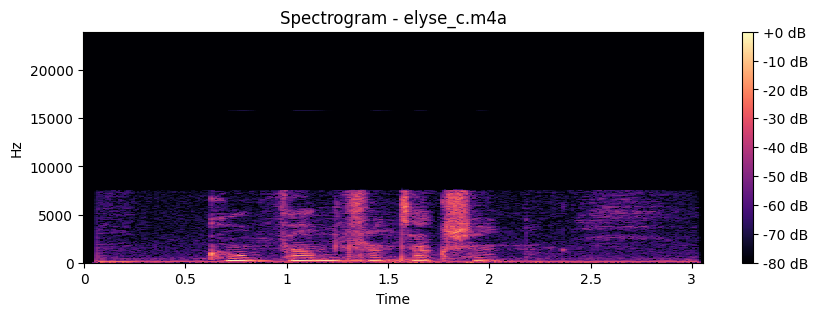

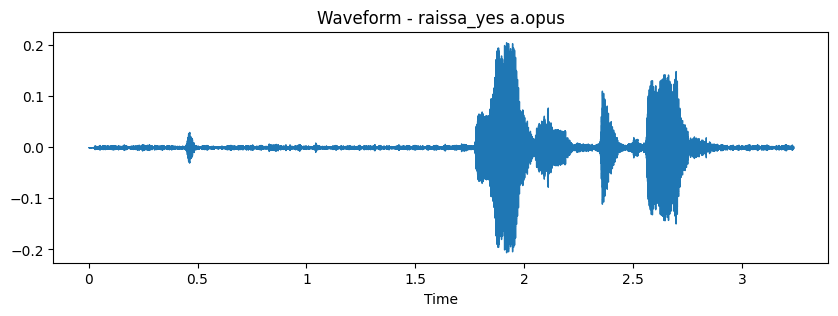

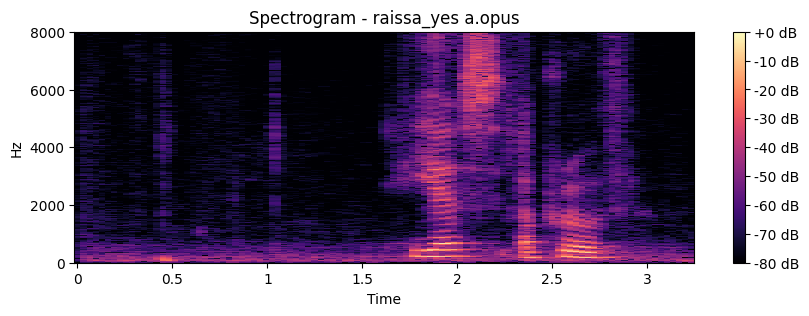

/tmp/ipython-input-2391635644.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filepath, sr=None)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


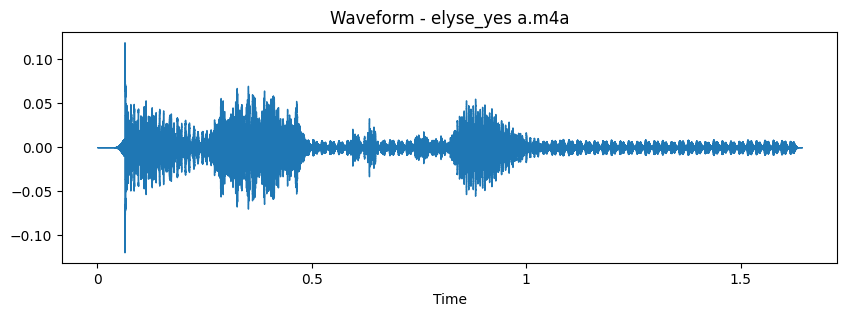

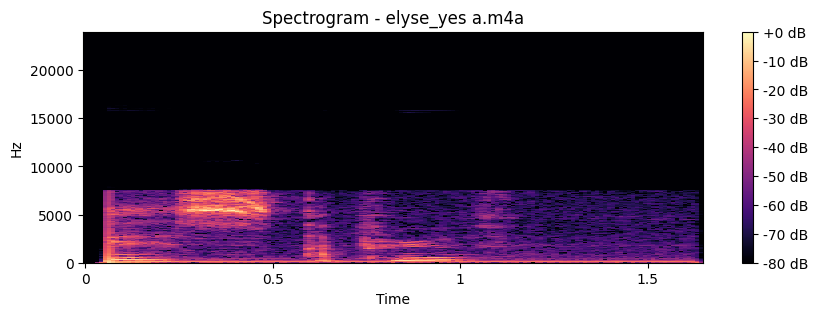

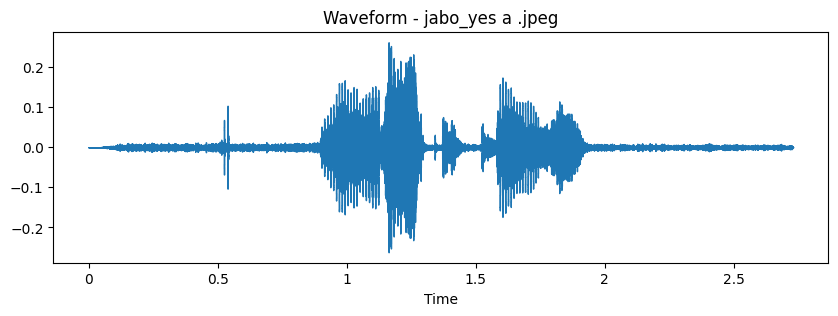

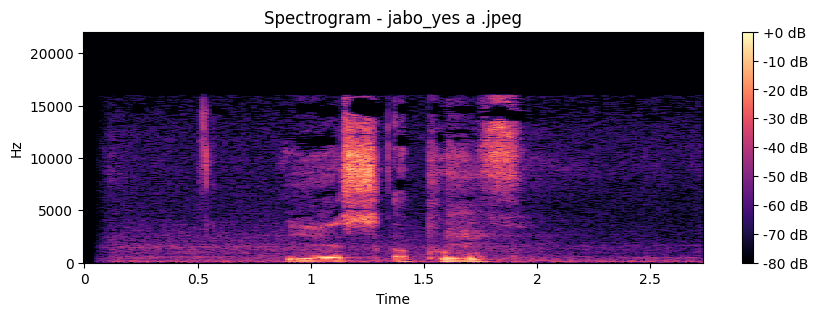

In [4]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

def visualize_audio(filepath):
    y, sr = librosa.load(filepath, sr=None)
    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform - {os.path.basename(filepath)}")
    plt.show()

    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(10, 3))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
    plt.title(f"Spectrogram - {os.path.basename(filepath)}")
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# Display all uploaded audio files
for file in os.listdir("data/audio"):
    visualize_audio(f"data/audio/{file}")


In [6]:
import librosa
import soundfile as sf
import numpy as np
import os

def augment_audio(filepath):
    # Load the audio file
    y, sr = librosa.load(filepath, sr=None)
    base = os.path.splitext(os.path.basename(filepath))[0]

    # 1. Pitch Shift (+2 semitones)
    y_pitch = librosa.effects.pitch_shift(y=y, sr=sr, n_steps=2)
    sf.write(f"data/augmented/{base}_pitch.wav", y_pitch, sr)

    # 2. Add Background Noise
    noise = np.random.randn(len(y))
    y_noise = y + 0.005 * noise
    sf.write(f"data/augmented/{base}_noise.wav", y_noise, sr)

# Apply augmentations to all audio files
for file in os.listdir("data/audio"):
    if file.endswith(('.wav', '.mp3')):
        augment_audio(f"data/audio/{file}")

print("Augmented files created successfully:")
!ls data/augmented | head


Augmented files created successfully:


In [7]:
import pandas as pd

def extract_features(filepath):
    y, sr = librosa.load(filepath, sr=None)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    energy = np.mean(y**2)
    return [filepath, *mfccs, rolloff, energy]

# Include both original and augmented files
all_files = [f"data/audio/{f}" for f in os.listdir("data/audio")] + \
             [f"data/augmented/{f}" for f in os.listdir("data/augmented")]

features = [extract_features(f) for f in all_files]
columns = ["filename"] + [f"mfcc{i}" for i in range(1,14)] + ["rolloff","energy"]
df = pd.DataFrame(features, columns=columns)
df.to_csv("audio_features.csv", index=False)
print("audio_features.csv saved with", df.shape[0], "rows.")
df.head()


/tmp/ipython-input-2870726500.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filepath, sr=None)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-2870726500.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filepath, sr=None)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-2870726500.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filepath, sr=None)
/usr/local/lib/python3.12/dist-packages/librosa/cor

audio_features.csv saved with 8 rows.


,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,rolloff,energy
0,data/audio/wengel _yes a.jpeg,-450.667145,105.704910,26.767832,14.040583,17.366327,17.254723,4.104730,2.011827,-15.925424,5.015988,-1.542394,6.644774,2.206316,11134.224981,0.000825
1,data/audio/jabo_c.jpeg,-429.445160,112.914238,4.530657,61.940678,-23.151131,35.251080,-20.863838,17.802532,5.626074,8.653033,-0.237390,1.337964,5.694159,9215.465844,0.000226
2,data/audio/raissa_c.opus,-452.440216,107.387459,17.276230,30.525764,10.247100,-0.309489,-3.413028,0.234192,5.635761,5.566479,-7.122958,-3.315292,-3.295880,2772.780374,0.000375
3,data/audio/wengel_c.jpeg,-479.605682,101.630196,27.546347,11.535661,16.154264,11.178510,2.138833,-2.805774,-17.475325,3.601664,1.643881,3.482744,1.265399,11691.762743,0.001029
4,data/audio/elyse_c.m4a,-540.957214,134.369690,-9.482505,37.443031,25.611553,0.796205,31.294048,11.724378,-0.324742,12.408496,0.783762,8.859607,13.489156,3370.590157,0.000191


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Label each file by speaker name (based on filename)
df["label"] = df["filename"].apply(lambda x: os.path.basename(x).split("_")[0])

X = df.drop(["filename","label"], axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds, average="weighted")

print(f"Model Accuracy: {acc:.2f}")
print(f"Model F1 Score: {f1:.2f}")


Model Accuracy: 0.67
Model F1 Score: 0.67


In [9]:
import joblib
joblib.dump(model, "voiceprint_model.pkl")
print("voiceprint_model.pkl saved successfully.")


voiceprint_model.pkl saved successfully.
